# Plotly

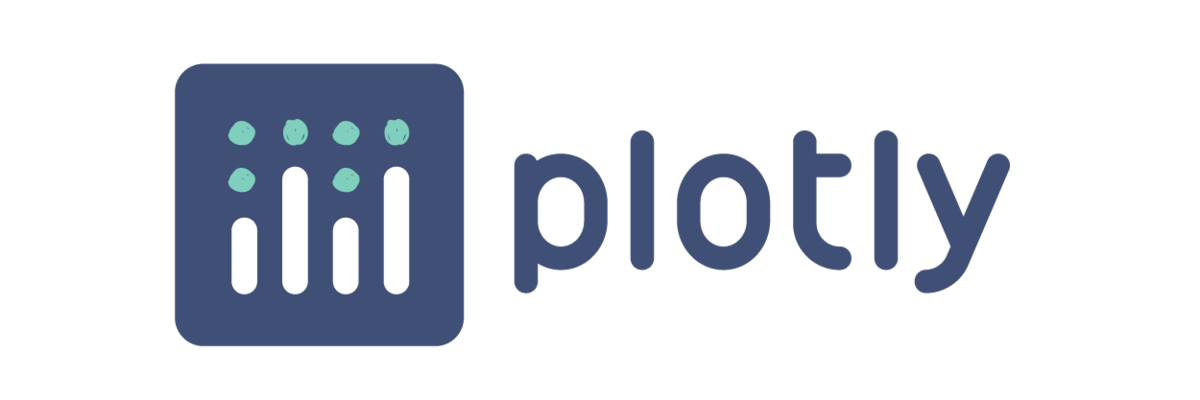

Gráficos interativos.

https://plotly.com/python/

In [ ]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

#### Dados: Cotação do Bitcoin

Fonte: https://www.kaggle.com/mczielinski/bitcoin-historical-data

CSV files for select bitcoin exchanges for the time period of Jan 2012 to September 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time.

In [ ]:
cotacao_bitcoin = pd.read_csv('https://github.com/ftorresd/OCEAN-datasets/raw/main/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2020-09-14.csv')

In [ ]:
cotacao_bitcoin

In [ ]:
cotacao_bitcoin.info()

In [ ]:
cotacao_bitcoin.describe()

Convertendo Timestamp para data.

In [ ]:
cotacao_bitcoin['date'] = pd.to_datetime(cotacao_bitcoin['Timestamp'], unit='s')
cotacao_bitcoin

### Cotação de abertura.

In [ ]:
# # configure_plotly_browser_state() # truque para o Plotly funcionar no Google Colab

# open = go.Scatter(x = cotacao_bitcoin['date'],
#                     y = cotacao_bitcoin['Open'],
#                     mode = 'markers',
#                     name = 'Abertura')

# # fig = go.Figure( open )
# # fig.show()

#### O que aconteceu?

**Muitos dados!**

#### Agrupando dados

Por dia:

In [ ]:
buffer = cotacao_bitcoin.groupby((cotacao_bitcoin.index // (60*24))).first()


In [ ]:
open = go.Scatter(x = buffer['date'],
                    y = buffer['Open'],
                    mode = 'lines+markers',
                    name = 'Abertura')

fig = go.Figure( open )
fig.show()